In [9]:
!pip install pandas_datareader
import pandas as pd
from pandas_datareader import data as web
import numpy as np
from sklearn.decomposition import KernelPCA

In [17]:
data = pd.DataFrame()
data['DAX'] = web.DataReader('DAX',start='2018-12-1',end='2019-12-1',data_source='yahoo')['Adj Close']
data['HSCEI'] = web.DataReader('^HSCE',start='2018-12-1',end='2019-12-1',data_source='yahoo')['Adj Close']
data['SnP'] = web.DataReader('SNP',start='2018-12-1',end='2019-12-1',data_source='yahoo')['Adj Close']
data

,DAX,HSCEI,SnP
Date,,,
2018-11-30,24.429424,NaN,78.435539
2018-12-03,24.836899,10882.160156,81.054970
2018-12-04,24.104208,10907.540039,79.382210
2018-12-06,23.826817,10480.719727,77.764610
2018-12-07,23.381081,10369.400391,75.715019
2018-12-10,23.291168,10273.200195,74.961365
2018-12-11,23.337080,10245.009766,74.897034
2018-12-12,23.778990,10417.160156,75.816124
2018-12-13,23.520731,10556.849609,77.203957


In [18]:
Ld = pd.DataFrame()
Ld['DAX'] = np.log(data.DAX/data.DAX.shift(1))
Ld['HSCEI'] = np.log(data.HSCEI/data.HSCEI.shift(1))
Ld['S&P'] = np.log(data.SnP/data.SnP.shift(1))
Ld

,DAX,HSCEI,S&P
Date,,,
2018-11-30,NaN,NaN,NaN
2018-12-03,0.016542,NaN,0.032850
2018-12-04,-0.029944,0.002330,-0.020853
2018-12-06,-0.011575,-0.039917,-0.020588
2018-12-07,-0.018885,-0.010678,-0.026710
2018-12-10,-0.003853,-0.009321,-0.010004
2018-12-11,0.001969,-0.002748,-0.000859
2018-12-12,0.018759,0.016664,0.012197
2018-12-13,-0.010920,0.013320,0.018140


In [19]:
Ld.mean()

DAX      0.000503
HSCEI   -0.000276
S&P     -0.001358
dtype: float64

In [20]:
np.sqrt(1+(1+Ld.mean())**(252)-1)-1

DAX      0.065356
HSCEI   -0.034237
S&P     -0.157413
dtype: float64

In [21]:
(1+Ld.mean())**(126)-1

DAX      0.065356
HSCEI   -0.034237
S&P     -0.157413
dtype: float64

C:\Users\van\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: covariance is not symmetric positive-semidefinite.


V 9851.539377652609


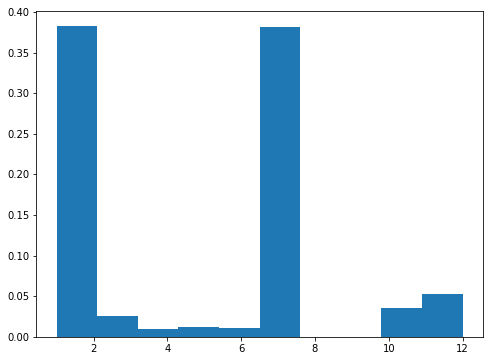

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)

rate = [0.065356,-0.034237,-0.157413]


sigma_DAX = 0.1521
sigma_HSCEI = 0.1795
sigma_SP = 0.1495
cor_DH = cor_HD = 0.22485
cor_DS = cor_SD = 0.62240
cor_HS = cor_SH = 0.31725
corrmat = [[1,cor_DH,cor_DS],
           [cor_HD,1,cor_DS],
           [cor_SD,cor_SH,1]]


LB = 0.43 
R = 0.044
times = np.array([0.5, 1, 1.5, 2, 2.5, 3])
er = np.array([0.925,0.925,0.90,0.90, 0.85,0.8,0.43]) #evaluation rate

pf = np.array([1,2,3,4,5,6])*R/2+1 #auto call payoff
df = np.exp(-0.01415*times) #국고채 이자율


times2 = np.append(0,times)
dt = np.diff(times2)
mcnum = 1000000

X  = np.zeros((mcnum,len(times2)))
X1 = np.zeros((mcnum,len(times2)))
X2 = np.zeros((mcnum,len(times2)))
X3 = np.zeros((mcnum,len(times2)))

for i,h in enumerate(dt):
    zzz = np.random.multivariate_normal([0,0,0], corrmat, mcnum)
    dw = zzz*np.sqrt(h)
    X1[:,i+1] = X1[:,i] + (rate[0]-0.5*sigma_DAX**2)*h + sigma_DAX*dw[:,0]  
    X2[:,i+1] = X2[:,i] + (rate[1]-0.5*sigma_HSCEI**2)*h + sigma_HSCEI*dw[:,1]  
    X3[:,i+1] = X3[:,i] + (rate[2]-0.5*sigma_SP**2)*h + sigma_SP*dw[:,2]      
    X[:,i+1] = np.minimum(np.minimum(X1[:,i+1],X2[:,i+1]),X3[:,i+1])
    X[:,i+1] 
        
S = np.exp(X[:,1:])
P = np.zeros(mcnum)
autocall = np.zeros(mcnum)
for i,ss in enumerate(S):
    flag=0
    for j,s in enumerate(ss):
        if s>=er[j]: #각 시점별 조기상환조건 넘으면
            flag=1
            P[i] = pf[j]*df[j]  #조기상환지급금액*할인율
            autocall[i] = j+1  
            break;
    if flag==0:
        if LB==np.nan:
            P[i] = s*df[-1]
        else:
            if len(ss[ss<=LB])>0:  #0.43보다 낮은 갯수가 하나라도 있으면
                if s<0.2:
                    P[i] = s*df[-1]  
                    autocall[i] = j+7

                elif s<0.4:
                    P[i] = s*df[-1]  
                    autocall[i] = j+6

                elif s<0.6:
                    P[i] = s*df[-1]  
                    autocall[i] = j+5
                  
                elif s<0.8:
                    P[i] = s*df[-1]  
                    autocall[i] = j+4
                elif s<1:
                    P[i] = s*df[-1]
                    autocall[i] = j+3
    
            else: #0.43보다 낮은 갯수 하나도 없으면
                P[i] = pf[-1]*df[-1]  #지급금액은 X(T6)*할인율
                autocall[i] = j+2
            
V = np.mean(P)
print('V', V*10000)
plt.hist(autocall, normed=True)
plt.show()

In [23]:
pd.Series(autocall).value_counts()/len(autocall)*100

7.0     41.9952
1.0     37.0757
11.0     5.7614
2.0      5.0074
10.0     3.8955
3.0      2.7694
5.0      1.2688
6.0      1.2029
4.0      1.0220
12.0     0.0013
9.0      0.0004
dtype: float64